In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pygrib
from cartopy import config
import cartopy.feature as cfeature
import cartopy.crs as ccrs

fname = "/home/earthshakira/gfs.t00z.pgrb2b.0p25.f030"
x = pygrib.open(fname)
b = True
ucomp = None
for d in x:
    if b:
        b=False
    else:
        break
    if str(d).split(":")[0] == "5":
        ucomp = d.data()[0]
    if str(d).split(":")[0] == "6":
        break
d = d.data()
lat = d[1]
lon = d[2]
sst = d[0]

In [49]:
ucomp = np.delete(ucomp, range(1, ucomp.shape[0], 2), axis=0)
ucomp = np.delete(ucomp, range(1, ucomp.shape[1], 2), axis=1)
ucomp = np.delete(ucomp, range(1, ucomp.shape[0], 2), axis=0)
ucomp = np.delete(ucomp, range(1, ucomp.shape[1], 2), axis=1)

lat = np.delete(lat, range(1, lat.shape[0], 2), axis=0)
lat = np.delete(lat, range(1, lat.shape[1], 2), axis=1)
lat = np.delete(lat, range(1, lat.shape[0], 2), axis=0)
lat = np.delete(lat, range(1, lat.shape[1], 2), axis=1)

lon = np.delete(lon, range(1, lon.shape[0], 2), axis=0)
lon = np.delete(lon, range(1, lon.shape[1], 2), axis=1)
lon = np.delete(lon, range(1, lon.shape[0], 2), axis=0)
lon = np.delete(lon, range(1, lon.shape[1], 2), axis=1)

sst = np.delete(sst, range(1, sst.shape[0], 2), axis=0)
sst = np.delete(sst, range(1, sst.shape[1], 2), axis=1)
sst = np.delete(sst, range(1, sst.shape[0], 2), axis=0)
sst = np.delete(sst, range(1, sst.shape[1], 2), axis=1)

(721, 1440)


TypeError: set_ylim() got an unexpected keyword argument 'crs'

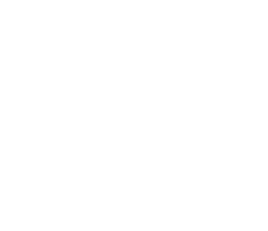

In [15]:
# Draw coastlines so we know where we are:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io import img_tiles

# tiles = img_tiles.OSM()
print(lat.shape)
ax = plt.axes(projection=ccrs.Mercator(central_longitude=0),frameon=False)
# cs = plt.contour(lon,lat, sst, 2000,transform=ccrs.PlateCarree(),levels=range(220,300,2),linewidths=0.1) 
# ax.barbs(lon, lat, ucomp, sst,transform=ccrs.PlateCarree(),length=2,linewidth=0.1)
ax.set_extent([-180,179,89,-89],cr)
# ax.add_image(tiles, 9)
# ax.add_feature(cfeature.BORDERS, linewidth=0.01)
ax.add_feature(cfeature.COASTLINE, linewidth=0.1)

plt.savefig("base.png",format="png",dpi=2000, bbox_inches='tight',pad_inches=0,transparent=True)
plt.show()